In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
df = '/content/diabetes.csv'
df = pd.read_csv(df)

In [ ]:
print(df.head())
print(df.isnull().sum())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   Pedigree  Age  Outcome  
0     0.627   50        1  
1     0.351   31        0  
2     0.672   32        1  
3     0.167   21        0  
4     2.288   33        1  
Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64


In [ ]:
scaler = StandardScaler()
# Check the column names in your dataframe
print(df.columns)
# Replace 'target' with the actual name of the target variable column if it's different.
X_scaled = scaler.fit_transform(df.drop('Outcome', axis=1))
y = df['Outcome']

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
test_size=0.3, random_state=42)


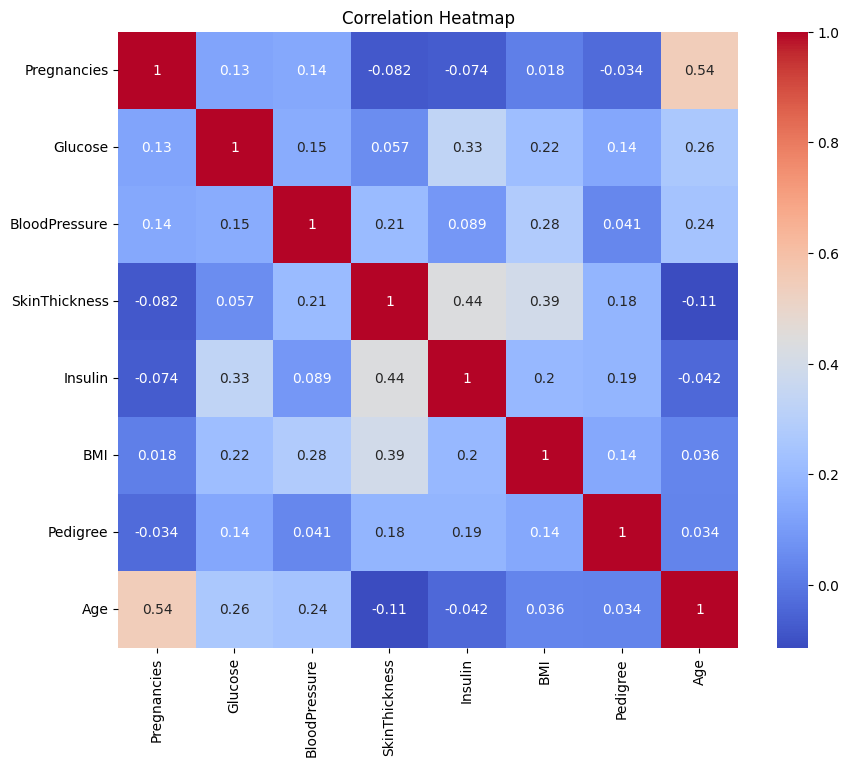

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(X_scaled, columns=df.drop('Outcome', axis=1).columns).corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
error_rate = []
k_range = range(1, 31)
for k in k_range:
 knn = KNeighborsClassifier(n_neighbors=k)
 knn.fit(X_train, y_train)
 y_pred = knn.predict(X_test)
 error_rate.append(np.mean(y_pred != y_test))

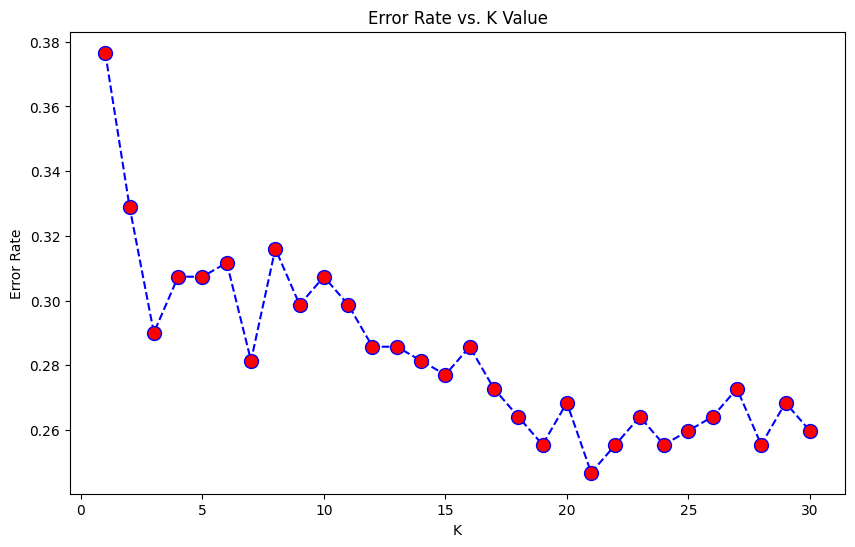

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, error_rate, color='blue', linestyle='dashed',
marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
 #Training KNN with the optimal K (chosen from the elbow method)
optimal_k = 5 # Suppose the elbow method suggested K=5
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)
y_pred_optimal = knn_optimal.predict(X_test)

print("Classification Report:\n", classification_report(y_test,
y_pred_optimal))


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.79      0.77       151
           1       0.56      0.51      0.54        80

    accuracy                           0.69       231
   macro avg       0.66      0.65      0.65       231
weighted avg       0.69      0.69      0.69       231



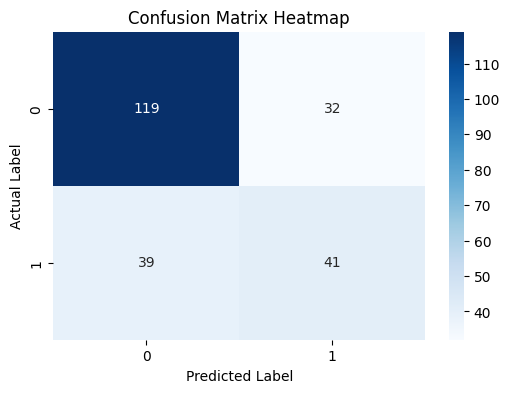

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_optimal)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)
knn_2d = KNeighborsClassifier(n_neighbors=optimal_k)
knn_2d.fit(X_train_2d, y_train)
KNeighborsClassifier()


KNeighborsClassifier()

In [ ]:
# Plotting the decision boundary
h = .02 # step size in the mesh
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min,
y_max, h))


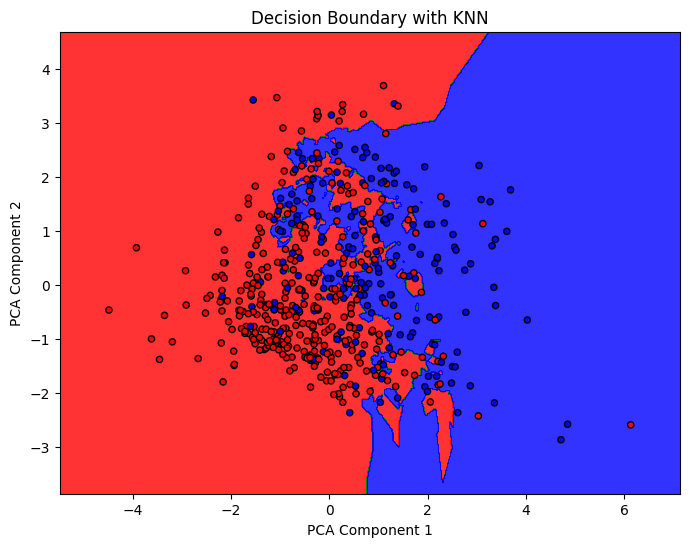

In [ ]:
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=ListedColormap(('red', 'green', 'blue')), alpha=0.8)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=ListedColormap(('red', 'green', 'blue')), edgecolor='k', s=20)
plt.title('Decision Boundary with KNN')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [ ]:
metrics = ['euclidean', 'manhattan', 'chebyshev']
accuracy_scores = []
for metric in metrics:
 knn_metric = KNeighborsClassifier(n_neighbors=optimal_k,
metric=metric)
 knn_metric.fit(X_train, y_train)
 y_pred_metric = knn_metric.predict(X_test)
 accuracy_scores.append(accuracy_score(y_test, y_pred_metric))


<ipython-input-27-51f6d1db85ff>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=accuracy_scores, palette="viridis")


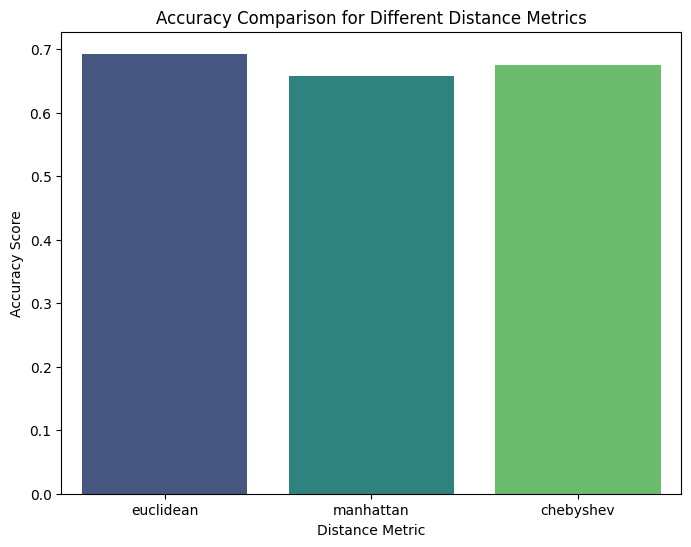

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=accuracy_scores, palette="viridis")
plt.title('Accuracy Comparison for Different Distance Metrics')
plt.xlabel('Distance Metric')
plt.ylabel('Accuracy Score')
plt.show()